In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
housing_ds = pd.read_csv('housing_data.csv')

In [69]:
housing_ds.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [70]:
housing_ds.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

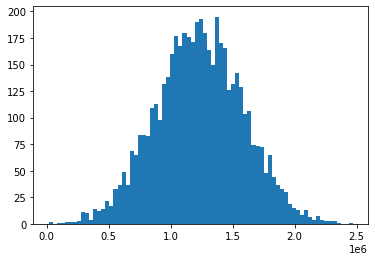

In [71]:
plt.hist(housing_ds['Price'], bins=75)
plt.show()

In [72]:
#Correlation Matrix

In [73]:
housing_ds.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [74]:
#Feature and variable sets

In [75]:
x = pd.DataFrame(housing_ds)

In [76]:
x.drop('Price', axis=1, inplace=True)
x.drop('Address', axis=1, inplace=True)


In [77]:
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [78]:
y = housing_ds['Price']

In [79]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [80]:
#SHAPE

In [81]:
x.shape

(5000, 5)

In [82]:
y.shape

(5000,)

In [83]:
#Test-Train Split

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [86]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3500, 5), (1500, 5), (3500,), (1500,))

In [87]:
x_train.size, x_test.size, y_train.size, y_test.size

(17500, 7500, 3500, 1500)

In [88]:
#Model fit and training

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
lm = LinearRegression()

In [91]:
lm.fit(x_train, y_train)

LinearRegression()

In [92]:
predictions = lm.predict(x_test)
predictions.size

1500

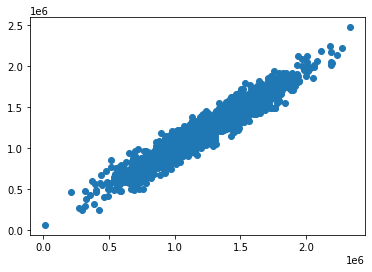

In [93]:
plt.scatter(y_test, predictions)

In [94]:
from sklearn.metrics import r2_score

In [95]:
r2_score(y_test, predictions)

0.9170145688163688

In [96]:
#K-nearest neighbor Classification

In [97]:
classified_df = pd.read_csv('classified_data.txt', index_col='Unnamed: 0')

In [98]:
classified_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [99]:
classified_df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [100]:
columnclass = list(classified_df.columns)
columnclass.remove('TARGET CLASS')
columnclass

['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ']

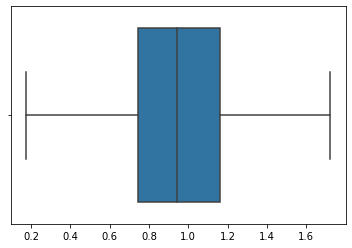

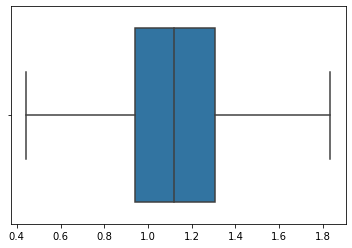

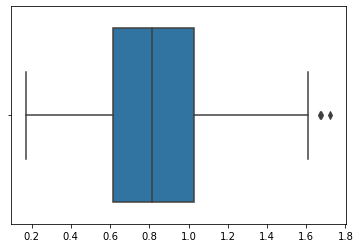

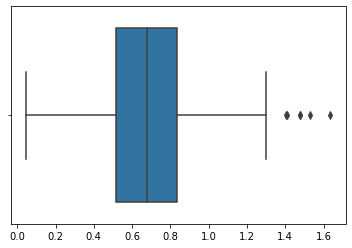

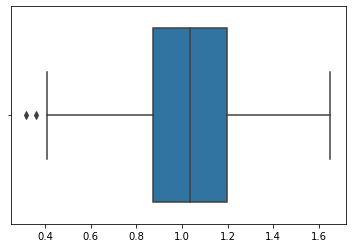

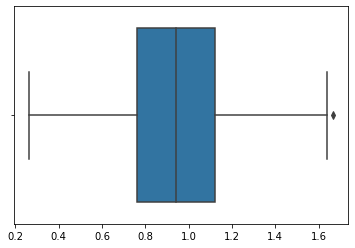

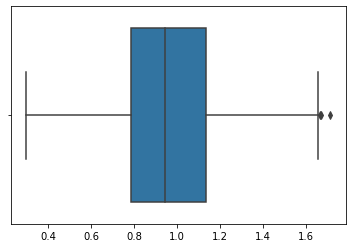

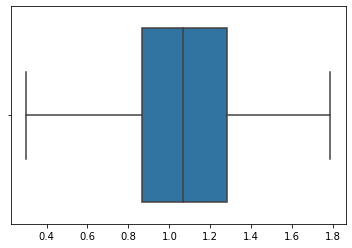

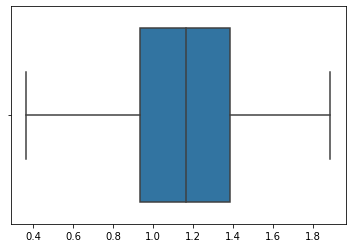

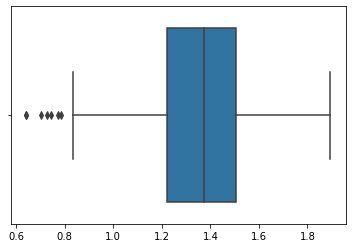

In [101]:
for column in columnclass:
    x=classified_df[column].values
    sns.boxplot(x=x, data=classified_df)
    plt.show()

In [102]:
#Standardize the features using sklearn.preprocessing

In [103]:
from sklearn.preprocessing import StandardScaler

In [104]:
scaler = StandardScaler()

In [105]:
feature_data=classified_df[['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ']].copy()

In [106]:
scaled_data=scaler.fit_transform(feature_data)

In [107]:
x=pd.DataFrame(scaled_data, columns=columnclass)
x.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [108]:
#Train/Test Split

In [109]:
from sklearn.model_selection import train_test_split
y=classified_df['TARGET CLASS']

In [110]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [111]:
#Model fit and training

In [112]:
from sklearn.neighbors import KNeighborsClassifier

In [113]:
model = KNeighborsClassifier(n_neighbors=1)

In [114]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [115]:
pred=model.predict(x_test)

In [116]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90       148
           1       0.88      0.93      0.90       152

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [117]:
round(model.score(x_test, y_test),3)

0.9

In [118]:
#Choosing optimal 'k'

In [119]:
acc=[]
for i in range(1,61):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    acc.append(round(model.score(x_test, y_test),3))

In [120]:
#Plot a graph of K value vs Accuracy

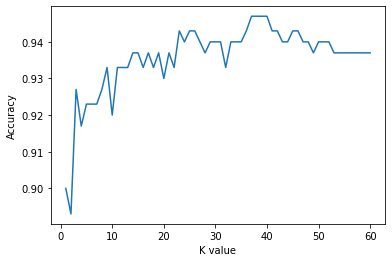

In [121]:
plt.plot(range(1,61),acc)
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.show()

In [122]:
#Choose the best value of n_neighbours and give a reason why and also print the accuracy

In [123]:
best_value=40
acc[best_value-1]

0.947

In [124]:
from sklearn.model_selection import GridSearchCV

In [125]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

In [126]:
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [127]:
knn_2 = KNeighborsClassifier()

In [128]:
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

In [129]:
best_model = clf.fit(x_train,y_train)

In [130]:
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 14


In [131]:
knn_1=KNeighborsClassifier(leaf_size=1, p=1, n_neighbors=14)

In [132]:
model1=knn_1.fit(x_train,y_train)
pred1=model1.predict(x_test)

In [133]:
report=classification_report(y_test, pred1, output_dict=True)
print(round(report["accuracy"],3))

0.933


In [134]:
#Decision Tree Classifier

In [135]:
titanic_df=pd.read_csv('titanic_data.csv')


In [136]:
from sklearn.tree import DecisionTreeClassifier

In [137]:
titanic_df.columns, titanic_df.head()

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
    PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C8

In [138]:
titanic_df['male'] = titanic_df['Sex'] == 'male'

In [139]:
def normalize(data_list):
  X_new = []
  X_max = max(data_list)
  X_min = min(data_list)
  for i in data_list:
    X_new.append( (i - X_min)/(X_max - X_min) )
  return X_new


def preprocessing_t1(train):
    train.drop(["PassengerId", "Ticket", "Name"], axis=1, inplace=True)
    
    df_nan = pd.DataFrame()
    
    nan_dict = {}
    for i in train.columns:
      nan_dict[i] = (train[i].isnull().sum()/len(train))*100
    
    df_nan["Column"] = nan_dict.keys()
    df_nan["nan_percentage"] = nan_dict.values()
    
    train.drop(["Cabin"], axis=1, inplace=True)
    
    train["Embarked"].fillna(train["Embarked"].mode()[0], inplace=True)
    train["Age"].fillna(train["Age"].mean(), inplace=True)
    train["Family_members"] = train["SibSp"] + train["Parch"]
    train.drop(["SibSp", "Parch"], axis=1, inplace=True)
    
    train["Age"] = normalize(train["Age"])
    train["Fare"] = normalize(train["Fare"])
    train["Family_members"] = normalize(train["Family_members"]) 
    
    df_ohe = pd.get_dummies(train, columns=["Pclass", "Sex", "Embarked"])
    return df_ohe


In [140]:
titanic_df=preprocessing_t1(titanic_df)

In [141]:
y=titanic_df['Survived'].values

In [142]:
x=titanic_df[['Age', 'Fare', 'male']].values

In [143]:
from sklearn.model_selection import train_test_split


In [144]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [145]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

In [146]:
kf = KFold(n_splits=50, shuffle=True)
test_acc=[]
train_acc=[]
model = RandomForestClassifier(n_estimators=300, max_depth=15)
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(x_train, y_train)
    test_acc.append(model.score(x_test, y_test))
    train_acc.append(model.score(x_train, y_train))

In [147]:
print('test accuracy: ', max(test_acc))
print('train accuracy:', train_acc[test_acc.index(max(test_acc))])

test accuracy:  1.0
train accuracy: 0.979381443298969


In [148]:
from sklearn.model_selection import cross_val_score

In [149]:
cross_val_score(clf,x_train,y_train,cv=5)

array([0.74285714, 0.8       , 0.77142857, 0.75428571, 0.7816092 ])

In [156]:
clf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2]})

In [157]:
y_pred=clf.predict(x_test)

In [169]:
def compute(TruePos, TrueNeg, FalsePos, FalseNeg):
    Acc=((TruePos+TrueNeg)*100)/ float(TruePos + TrueNeg + FalsePos + FalseNeg)
    Precis=(TruePos * 100)/float (TruePos+FalsePos)
    Recall=(TruePos * 100)/float (TruePos +FalseNeg)
    f1=(2*Precis*Recall)/(Precis + Recall)    
    print(Acc, Precis, Recall, f1)

In [170]:
def compute_TruePos_TrueNeg_FalsePos_FalseNeg(y_act, y_pred):
    TruePos = sum((y_act==1) & (y_pred ==1))
    TrueNeg = sum((y_act==0) & (y_pred ==0))
    FalseNeg = sum((y_act==1) & (y_pred ==0))
    FalsePos = sum((y_act==0) & (y_pred ==1))
    compute(TruePos, TrueNeg, FalsePos, FalseNeg)
    return TruePos, TrueNeg, FalsePos, FalseNeg

In [171]:
TruePos_dt, TrueNeg_dt, FalsePos_dt, FalseNeg_dt = compute_TruePos_TrueNeg_FalsePos_FalseNeg(y_test, y_pred)
print('True Positive:', TruePos_dt)
print('True Negative:', TrueNeg_dt)
print('False Positive:', FalsePos_dt)
print('False Negative:', FalseNeg_dt)

82.3529411764706 87.5 77.77777777777777 82.35294117647058
True Positive: 7
True Negative: 7
False Positive: 1
False Negative: 2
